# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


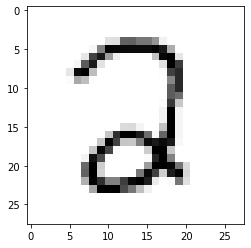

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.1965756995433066
train accuracy is: 0.8314972458688032, test accuracy is 0.8487903225806451


Epoch 10 Loss 0.047349936828338685
train accuracy is: 0.9474211316975463, test accuracy is 0.9591733870967742


Epoch 20 Loss 0.0360437765759151
train accuracy is: 0.9600233683859122, test accuracy is 0.9637096774193549


Epoch 30 Loss 0.03130216303846945
train accuracy is: 0.9652812552161576, test accuracy is 0.967741935483871


Epoch 40 Loss 0.028530388477506354
train accuracy is: 0.9678684693707228, test accuracy is 0.969758064516129


Epoch 50 Loss 0.02662677235667086
train accuracy is: 0.9705391420464029, test accuracy is 0.9702620967741935


Epoch 60 Loss 0.02520520530150638
train accuracy is: 0.971707561342013, test accuracy is 0.9722782258064516


Epoch 70 Loss 0.02407007889195112
train accuracy is: 0.9728759806376232, test accuracy is 0.9717741935483871


Epoch 80 Loss 0.023124337841827332
train accuracy is: 0.9745451510599232, test accuracy is 0.9717741935483871


Epoch 90 Loss 0.022321764361050513
train accuracy is: 0.9754631947921882, test accuracy is 0.9712701612903226


Epoch 100 Loss 0.02160714930979193
train accuracy is: 0.9763812385244534, test accuracy is 0.9717741935483871


Epoch 110 Loss 0.02093718072468526
train accuracy is: 0.9771323652144884, test accuracy is 0.9712701612903226


Epoch 120 Loss 0.020316932522115402
train accuracy is: 0.9769654481722584, test accuracy is 0.9717741935483871


Epoch 130 Loss 0.01977382792323752
train accuracy is: 0.9777165748622935, test accuracy is 0.9722782258064516


Epoch 140 Loss 0.01924344622855494
train accuracy is: 0.9783842430312135, test accuracy is 0.9722782258064516


Epoch 150 Loss 0.018720745906284697
train accuracy is: 0.9791353697212486, test accuracy is 0.9727822580645161


Epoch 160 Loss 0.0182503569690344
train accuracy is: 0.9798030378901685, test accuracy is 0.9737903225806451


Epoch 170 Loss 0.01778927857619697
train accuracy is: 0.9808045401435487, test accuracy is 0.9737903225806451


Epoch 180 Loss 0.017350369706723455
train accuracy is: 0.9817225838758137, test accuracy is 0.9737903225806451


Epoch 190 Loss 0.016929207736078755
train accuracy is: 0.9821398764813888, test accuracy is 0.9742943548387096


Epoch 200 Loss 0.016524971248921213
train accuracy is: 0.9823902520447337, test accuracy is 0.9747983870967742


Epoch 210 Loss 0.016121664057122665
train accuracy is: 0.9828075446503088, test accuracy is 0.9747983870967742


Epoch 220 Loss 0.015741988266034103
train accuracy is: 0.9833917542981139, test accuracy is 0.9753024193548387


Epoch 230 Loss 0.015384369404439182
train accuracy is: 0.9840594224670339, test accuracy is 0.9753024193548387


Epoch 240 Loss 0.01499924500997542
train accuracy is: 0.9844767150726089, test accuracy is 0.9763104838709677


0.02566920717139942

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2586552889606845
train accuracy is: 0.6095810382240027, test accuracy is 0.5962701612903226


Epoch 10 Loss 0.1051896794139291
train accuracy is: 0.9062760807878485, test accuracy is 0.9223790322580645


Epoch 20 Loss 0.07937508300658168
train accuracy is: 0.9288098814889, test accuracy is 0.9445564516129032


Epoch 30 Loss 0.06794857179458207
train accuracy is: 0.9386579869804708, test accuracy is 0.9536290322580645


Epoch 40 Loss 0.06121251156415565
train accuracy is: 0.9439993323318311, test accuracy is 0.9556451612903226


Epoch 50 Loss 0.0566682271315163
train accuracy is: 0.9468369220497412, test accuracy is 0.9586693548387096


Epoch 60 Loss 0.05335271906408272
train accuracy is: 0.9491737606409615, test accuracy is 0.9596774193548387


Epoch 70 Loss 0.05080033340318078
train accuracy is: 0.9502587214154565, test accuracy is 0.9611895161290323


Epoch 80 Loss 0.0487608936584618
train accuracy is: 0.9520113503588716, test accuracy is 0.9632056451612904


Epoch 90 Loss 0.047084237869022064
train accuracy is: 0.9535970622600568, test accuracy is 0.9642137096774194


Epoch 100 Loss 0.04567469537797483
train accuracy is: 0.9545151059923218, test accuracy is 0.9652217741935484


Epoch 110 Loss 0.04446889502464717
train accuracy is: 0.9551827741612419, test accuracy is 0.9652217741935484


Epoch 120 Loss 0.043420792360966125
train accuracy is: 0.9562677349357369, test accuracy is 0.9657258064516129


Epoch 130 Loss 0.04249799285983881
train accuracy is: 0.957018861625772, test accuracy is 0.9657258064516129


Epoch 140 Loss 0.04167972454728345
train accuracy is: 0.9579369053580371, test accuracy is 0.9662298387096774


Epoch 150 Loss 0.040945853767806135
train accuracy is: 0.9583541979636121, test accuracy is 0.9667338709677419


Epoch 160 Loss 0.040282688097370185
train accuracy is: 0.9585211150058421, test accuracy is 0.9682459677419355


Epoch 170 Loss 0.039680981575755746
train accuracy is: 0.9589384076114171, test accuracy is 0.9682459677419355


Epoch 180 Loss 0.039129512563892736
train accuracy is: 0.9591887831747622, test accuracy is 0.9682459677419355


Epoch 190 Loss 0.038623338576225276
train accuracy is: 0.9597729928225672, test accuracy is 0.9682459677419355


Epoch 200 Loss 0.038154536147102416
train accuracy is: 0.9601902854281422, test accuracy is 0.9692540322580645


Epoch 210 Loss 0.03772050569934542
train accuracy is: 0.9602737439492572, test accuracy is 0.9692540322580645


Epoch 220 Loss 0.03731636882693178
train accuracy is: 0.9604406609914873, test accuracy is 0.9692540322580645


Epoch 230 Loss 0.0369391039458185
train accuracy is: 0.9610248706392923, test accuracy is 0.9692540322580645


Epoch 240 Loss 0.036584878248767404
train accuracy is: 0.9611917876815222, test accuracy is 0.9692540322580645


0.012946641561911443

### Comparing results of NN and LR

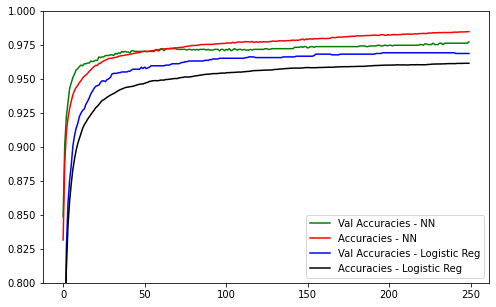

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

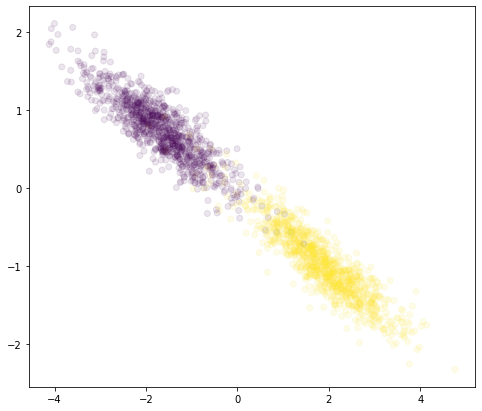

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

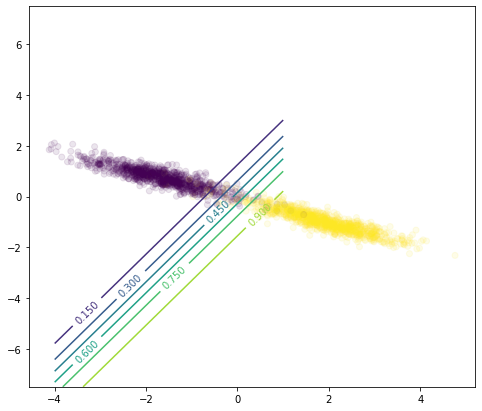

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );